# **Task-1**

In [1]:
import pandas as pd
import numpy as np


In [2]:
csv_data = pd.read_csv('clustering_data.csv' , low_memory=False)
csv_data.head()


,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
0,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Peddakotla B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5689,77.85624
1,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Pinnadhari B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5281,77.857014
2,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Yerraguntapalle B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.561111,77.85715
3,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Obulareddipalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.2488,78.2588
4,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Odulapalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.24555,78.2477


## **1) Filtering data**
### Homestate: Telangana

In [3]:
home_state = 'TELANGANA'
Ts_data = csv_data[csv_data['StateName'] == home_state]
Ts_data.head(10)

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
138,Telangana Circle,Hyderabad Region,Nizamabad Division,Arsapalli B.O,503186,BO,Delivery,NIZAMABAD,TELANGANA,18.6845544,78.0773742
139,Telangana Circle,Hyderabad Region,Nizamabad Division,Camp Ootpalli B.O,503180,BO,Delivery,NIZAMABAD,TELANGANA,18.5329923,77.618717
140,Telangana Circle,Hyderabad Region,Nizamabad Division,Eraspalli B.O,503180,BO,Delivery,NIZAMABAD,TELANGANA,18.5329923,77.618717
141,Telangana Circle,Hyderabad Region,Nizamabad Division,Singitham B.O,503187,BO,Delivery,KAMAREDDY,TELANGANA,18.3096558,77.9466324
142,Telangana Circle,Hyderabad Region,Nizamabad Division,Mahmadpur B.O,503101,BO,Delivery,KAMAREDDY,TELANGANA,18.2108201,78.4853495
143,Telangana Circle,Hyderabad Region,Nizamabad Division,Malkapur B.O,503125,BO,Delivery,KAMAREDDY,TELANGANA,18.2127127,78.549741
144,Telangana Circle,Hyderabad Region,Nizamabad Division,Tujlapur B.O,503125,BO,Delivery,KAMAREDDY,TELANGANA,18.1894413,78.5477163
145,Telangana Circle,Hyderabad Region,Nizamabad Division,Yadaram B.O,503125,BO,Delivery,KAMAREDDY,TELANGANA,18.3201713,78.3363317
146,Telangana Circle,Hyderabad Region,Nizamabad Division,Ugrawai B.O,503112,BO,Delivery,KAMAREDDY,TELANGANA,18.3258076,78.390802
147,Telangana Circle,Hyderabad Region,Nizamabad Division,Yellappagonda B.O,503112,BO,Delivery,KAMAREDDY,TELANGANA,18.324703,78.3361217


In [4]:
print(Ts_data.shape)
print(Ts_data.size)


(5816, 11)
63976


**_______________________________________________________________________________________________________________________________________________________________**

## **2) Data Visualization**
Python Folium library is used for more Graphical Interface

In [5]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [6]:
import folium
Ts_data=Ts_data.dropna(subset=['Longitude'])

Ts_data=Ts_data.dropna(subset=['Latitude'])

# Create a map centered around Telangana
map_center = [17.3850, 78.4867]  # Coordinates for Hyderabad, Telangana
map_telangana = folium.Map(location=map_center, zoom_start=7)

# Add pincode locations to the map
for _, row in Ts_data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Pincode: {row['Pincode']}",
    ).add_to(map_telangana)

# Even though i could display here, i cannot because its hanging the notebook
# map_telangana.save('telangana_pincodes_map.html')


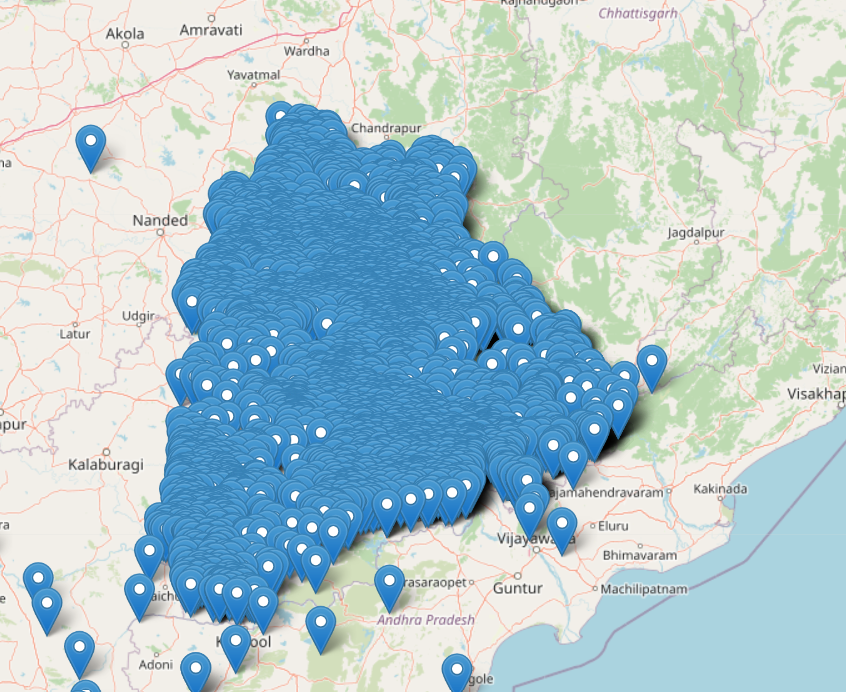

**_______________________________________________________________________________________________________________________________________________________________**

## **3) Clustering Analysis**

Read the following code for the implementation of K-means clusteing algorithm from scratch

In [7]:

Ts_data['Longitude'] = pd.to_numeric(Ts_data['Longitude'], errors='coerce')
Ts_data['Latitude'] = pd.to_numeric(Ts_data['Latitude'], errors='coerce')

Ts_data = Ts_data.dropna(subset=['Longitude', 'Latitude'])
X = Ts_data[['Longitude', 'Latitude']].to_numpy()

print(Ts_data.head())

           CircleName        RegionName        DivisionName  \
138  Telangana Circle  Hyderabad Region  Nizamabad Division   
139  Telangana Circle  Hyderabad Region  Nizamabad Division   
140  Telangana Circle  Hyderabad Region  Nizamabad Division   
141  Telangana Circle  Hyderabad Region  Nizamabad Division   
142  Telangana Circle  Hyderabad Region  Nizamabad Division   

            OfficeName  Pincode OfficeType  Delivery   District  StateName  \
138      Arsapalli B.O   503186         BO  Delivery  NIZAMABAD  TELANGANA   
139  Camp Ootpalli B.O   503180         BO  Delivery  NIZAMABAD  TELANGANA   
140      Eraspalli B.O   503180         BO  Delivery  NIZAMABAD  TELANGANA   
141      Singitham B.O   503187         BO  Delivery  KAMAREDDY  TELANGANA   
142      Mahmadpur B.O   503101         BO  Delivery  KAMAREDDY  TELANGANA   

      Latitude  Longitude  
138  18.684554  78.077374  
139  18.532992  77.618717  
140  18.532992  77.618717  
141  18.309656  77.946632  
142  18.2108

In [8]:
def distance(point1, point2):
    return np.linalg.norm(point1 - point2)


In [9]:
def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []
        curr_x = X[idx]
        for i in range(k):
            dis = distance(curr_x, clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters


In [10]:
def update_clusters(clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis=0)
            clusters[i]['center'] = new_center
        clusters[i]['points'] = []
    return clusters


In [11]:
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i], clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred


In [12]:
# K-means clustering Algorithm
def kmeans(X, clusters, max_iterations=1000, tolerance=1e-4):
    for _ in range(max_iterations):
        clusters = assign_clusters(X, clusters)
        new_clusters = update_clusters(clusters)
        
        converged = True
        for i in range(k):
            if np.linalg.norm(new_clusters[i]['center'] - clusters[i]['center']) >= tolerance:
                converged = False
                break
        
        clusters = new_clusters
        
        if converged:
            break
    
    return clusters


In [13]:
# Initialize k and the clusters
k = 5
clusters = [{'center': X[i], 'points': []} for i in np.random.choice(X.shape[0], k, replace=False)]

# Run k-means clustering
Ts_clusters = kmeans(X, clusters)

# Get the final cluster assignments
pred = pred_cluster(X, clusters)


Ts_data['Cluster'] = pred

# Display the first few rows with cluster assignments
print(Ts_data.head())


           CircleName        RegionName        DivisionName  \
138  Telangana Circle  Hyderabad Region  Nizamabad Division   
139  Telangana Circle  Hyderabad Region  Nizamabad Division   
140  Telangana Circle  Hyderabad Region  Nizamabad Division   
141  Telangana Circle  Hyderabad Region  Nizamabad Division   
142  Telangana Circle  Hyderabad Region  Nizamabad Division   

            OfficeName  Pincode OfficeType  Delivery   District  StateName  \
138      Arsapalli B.O   503186         BO  Delivery  NIZAMABAD  TELANGANA   
139  Camp Ootpalli B.O   503180         BO  Delivery  NIZAMABAD  TELANGANA   
140      Eraspalli B.O   503180         BO  Delivery  NIZAMABAD  TELANGANA   
141      Singitham B.O   503187         BO  Delivery  KAMAREDDY  TELANGANA   
142      Mahmadpur B.O   503101         BO  Delivery  KAMAREDDY  TELANGANA   

      Latitude  Longitude  Cluster  
138  18.684554  78.077374        1  
139  18.532992  77.618717        2  
140  18.532992  77.618717        2  
141 

**_______________________________________________________________________________________________________________________________________________________________**

## **4)Inference and Insights**

## Cluster 1
- **Description**: This cluster is concentrated in the northern part of Telangana.
- **Characteristics**: Predominantly rural, indicating potential for agricultural activities.
- **Implications**: Could benefit from improved agricultural infrastructure and support services.

## Cluster 2
- **Description**: This cluster is spread across urban areas, including the capital city.
- **Characteristics**: High population density and commercial activity.
- **Implications**: Focus on urban infrastructure, public transportation, and commercial development.

## Cluster 3
- **Description**: This cluster is located in the eastern part of the state.
- **Characteristics**: Mixed areas with both urban and rural characteristics.
- **Implications**: Balanced development approach needed, combining urban amenities with rural support.

## Cluster 4
- **Description**: This cluster is located in the western part of Telangana.
- **Characteristics**: Predominantly rural, with some semi-urban areas.
- **Implications**: Focus on rural development and connectivity to urban centers.

## Cluster 5
- **Description**: This cluster is spread in the southern part of the state.
- **Characteristics**: Moderate population density with emerging urban areas.
- **Implications**: Support for emerging urbanization and infrastructure development.


**_______________________________________________________________________________________________________________________________________________________________**

## **5)Visualization and Preprocessing**

Following code well establishes the clustering analysis and bar-chart representation for the State of Telanagana

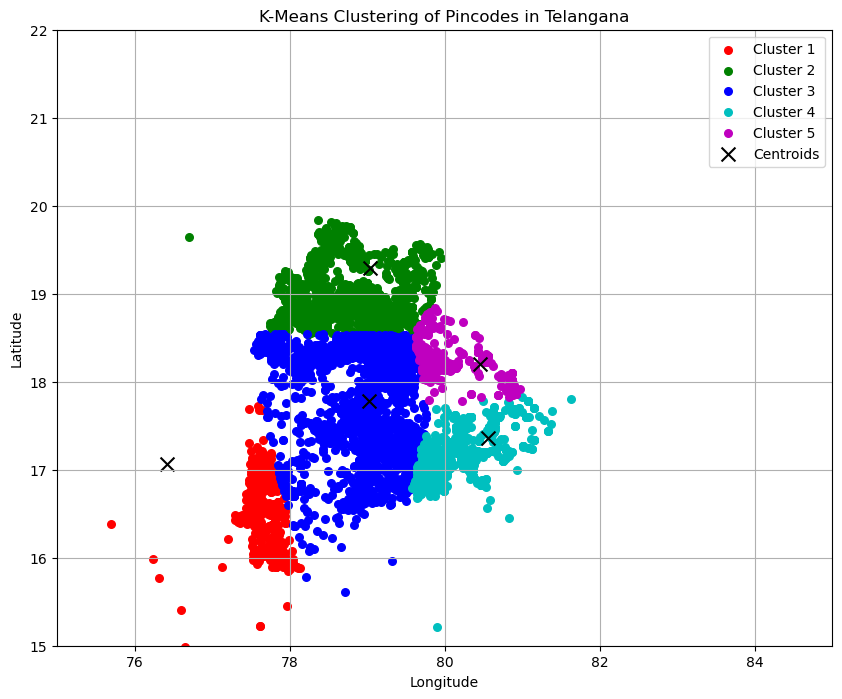

In [18]:
import matplotlib.pyplot as plt

# Visualize the clusters
plt.figure(figsize=(10, 8))
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for i in range(k):
    cluster_points = Ts_data[Ts_data['Cluster'] == i]
    
    plt.scatter(cluster_points['Longitude'], cluster_points['Latitude'], 
                color=colors[i % len(colors)], label=f'Cluster {i+1}', s =30)
    
plt.scatter([clusters[i]['center'][0] for i in range(k)], [clusters[i]['center'][1] for i in range(k)], 
            color='black', marker='x', s=100, label='Centroids')

plt.title('K-Means Clustering of Pincodes in Telangana')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)

# Set the x and y limits for a more zoomed-in picture
plt.xlim(75, 85)
plt.ylim(15, 22)

plt.show()


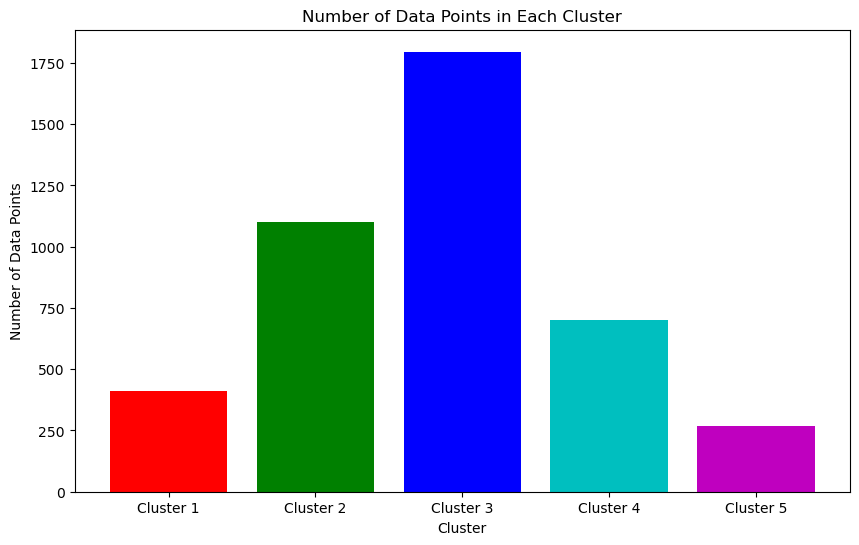

In [15]:
# Count the number of data points in each cluster
cluster_counts = Ts_data['Cluster'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(cluster_counts.index, cluster_counts.values, color=colors[:k])
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points in Each Cluster')
plt.xticks(cluster_counts.index, [f'Cluster {i+1}' for i in cluster_counts.index])
plt.show()
